# Machine Learning: Lab 4
## Regression & Clustering
TA: Bryan Coulier (bryan.coulier@kuleuven.be)


In [236]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_blobs
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import adjusted_rand_score

### Regression
Use the following regression techniques to create a ML model of the Housing.csv dataset:
- SVM regression (use grid search)
- KNN regression (use grid search)
- Linear regression
- Decision Tree regression

Make a train and test split, scale the features before training your models and compare the performance of the models by using the appropriate accuracy metrics

load the dataset

In [237]:
df = pd.read_csv('Housing.csv')
df = df.drop('index', axis=1)  # Remove redundant index column
X = df.drop('medv', axis=1)
y = df['medv']

Split data

In [238]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scale features

In [239]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr regressie

In [240]:
svr = SVR()
param_grid_svr = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.5]
}
grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_svr.fit(X_train_scaled, y_train)
best_svr = grid_svr.best_estimator_

knn regressie

In [241]:
knn = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)
best_knn = grid_knn.best_estimator_

linear regression

In [242]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

Decision Tree

In [243]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

Evalueren van de performantie

In [244]:
models = [
    ('SVM Regression', best_svr),
    ('KNN Regression', best_knn),
    ('Linear Regression', lr),
    ('Decision Tree Regression', dt)
]

for name, model in models:
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'  MSE: {mse:.2f}')
    print(f'  RMSE: {rmse:.2f}')
    print(f'  MAE: {mae:.2f}')
    print(f'  R²: {r2:.2f}\n')

SVM Regression:
  MSE: 12.74
  RMSE: 3.57
  MAE: 2.07
  R²: 0.83

KNN Regression:
  MSE: 15.69
  RMSE: 3.96
  MAE: 2.57
  R²: 0.79

Linear Regression:
  MSE: 24.29
  RMSE: 4.93
  MAE: 3.19
  R²: 0.67

Decision Tree Regression:
  MSE: 10.42
  RMSE: 3.23
  MAE: 2.39
  R²: 0.86



Use Randomized search for hyper parameter tuning with negative mean squared error as scoring, set the number of iterations to 1. Retrain the SVM with these new hyperparameters. Print out the best parameters and best score.

Definieren van de distributie parameters voor svm

In [245]:
param_dist_svr = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.5]
}

Randomized seach met 1 iteratie

In [246]:
random_svr = RandomizedSearchCV(
    SVR(),
    param_distributions=param_dist_svr,
    n_iter=1,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42
)

fitten op de trainin gdata 

In [247]:
random_svr.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'epsilon': [0.1, 0.5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear']},
                   random_state=42, scoring='neg_mean_squared_error')

uitprinten resultaten

In [248]:
print("Best Parameters:", random_svr.best_params_)
print("Best Score (Negative MSE):", random_svr.best_score_)

Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'C': 1}
Best Score (Negative MSE): -32.3581401119639


### Clustering
Perform clustering on the following randomly generated samples by using a pipeline with a standardscaler.

artificeilee daaset gegenereerd : clusters bepalen

In [249]:

# Generate synthetic data with blobs
X, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=1.0)


# Create a pipeline with StandardScaler and KMeans
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('kmeans', KMeans(n_clusters=3, n_init='auto', random_state=0))  # Cluster into 3 groups
])

# Fit the pipeline to the data and predict clusters
predicted_labels = pipeline.fit_predict(X)

# Evaluate clustering against true labels using Adjusted Rand Index
ari = adjusted_rand_score(y, predicted_labels)
print(f"Adjusted Rand Index: {ari:.2f}")



Adjusted Rand Index: 0.75


c:\Users\info\anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Plot the datapoints with a different color for each cluster, so you can visualy see the different clusters.

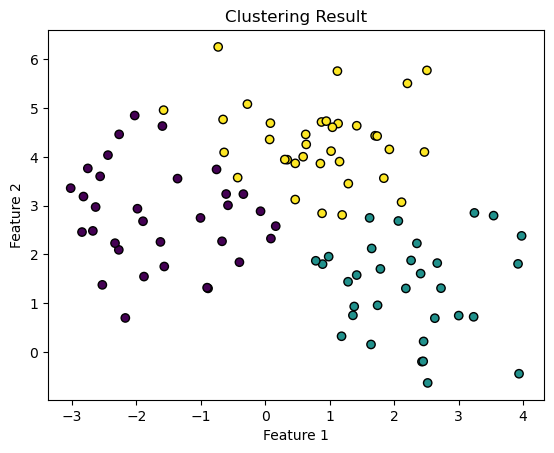

In [250]:
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k')
plt.title("Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Example

Given the "product_sales_clustering.csv" dataset containing customer purchase history for an online retailer, with the following columns:

- "Customer ID": a unique identifier for each customer.
- "Product Category": the category of the product purchased by the customer (e.g. electronics, clothing, home goods, etc.).
- "Purchase Amount": the amount spent by the customer on the product.

Your task is to perform clustering on this dataset to identify which customers are similar to each other based on their purchase history. 

- Use the elbow method to determine the optimal number of clusters, plot the elbow curve
- Fit the KMeans model with the chosen number of clusters
- Determine the accuracy of your clustering model, does your clustering model perform well?
- Given your clustering model, what are the characteristics of each cluster? What can you say about the purchase behavior of the customers in each cluster?

dataset van sales , telkens customer en de categrorie in wat die iets gekocht heeft , dan cluster genereen voor de dataset 
goed nadenken over het feit dat je niet meer clusters als categroeien hebt 

datasert omzetten in iets wat id eallemaal heeft gekeocht dus clusteren volgen B C en H


Stap 1 : data prepocessen

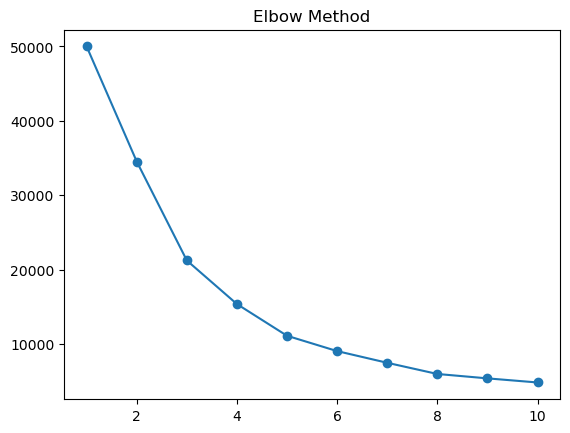

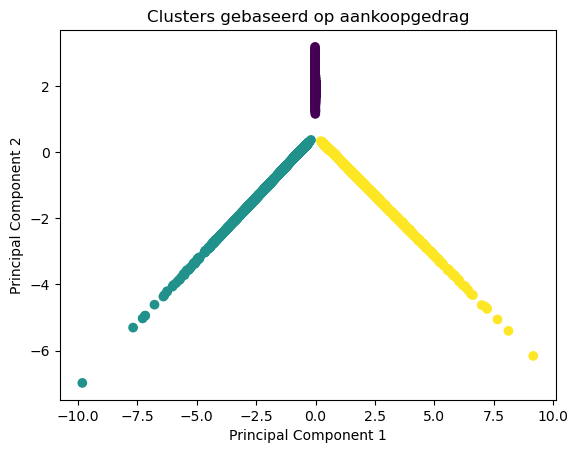

In [251]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Data Preprocessing
df = pd.read_csv('product_sales_clustering.csv')

# Maak een customer-product matrix (GEEN Customer ID als feature!)
customer_product_matrix = pd.pivot_table(
    df,
    index='Customer ID',
    columns='Product Category',
    values='Purchase Amount',
    aggfunc='sum',
    fill_value=0
)

# 2. Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_product_matrix)

# 3. Elbow Method (op de JUISTE features)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.show()

# 4. Clustering (voorbeeld met 3 clusters)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# 5. Visualisatie (PCA om dimensies te reduceren)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.scatter(principal_components[:,0], 
            principal_components[:,1], 
            c=clusters, 
            cmap='viridis')
plt.title('Clusters gebaseerd op aankoopgedrag')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

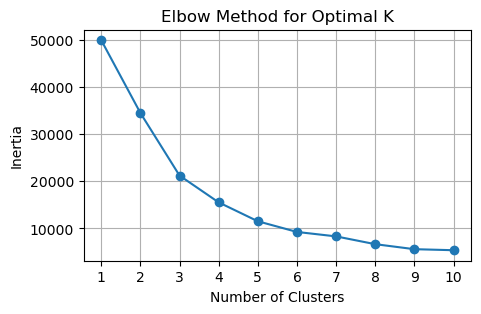


Cluster Summary (Average Purchases per Category):
Product Category     beauty    clothing  electronics  home goods     sports
Cluster                                                                    
0                  0.000000    0.000000   302.400574   50.084581   0.000000
1                 10.019193  150.453393     0.000000    0.000000   0.000000
2                  0.000000    0.000000     0.000000    0.000000  30.003145


Silhouette Score: 0.53


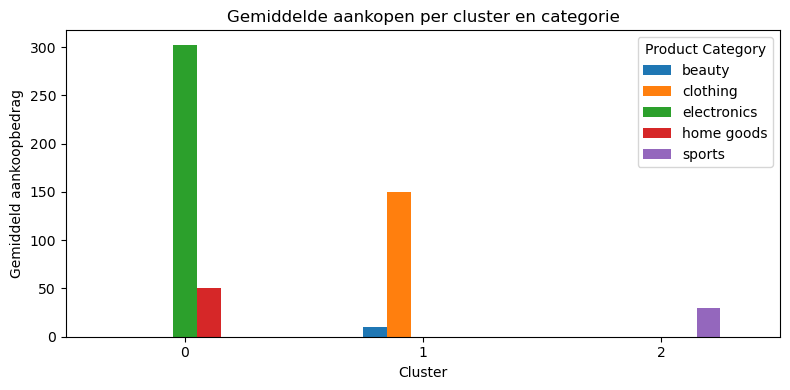

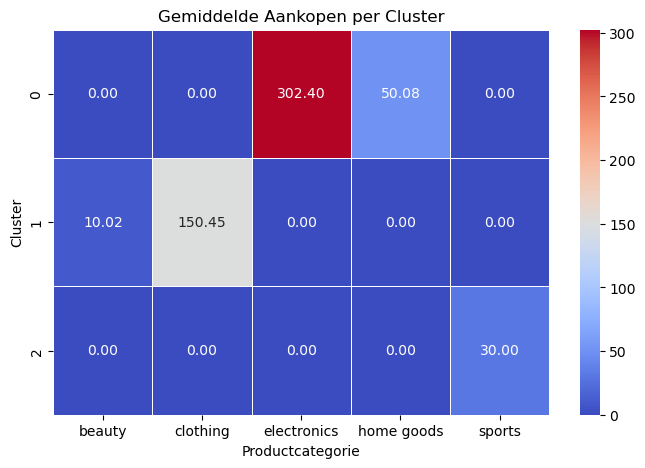

In [1]:
## van beau
# Importeer de benodigde bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

data = pd.read_csv('product_sales_clustering.csv')

# pivot table met Customer ID als index en de kolommen de productcategorieën
pivot_data = data.pivot_table(index='Customer ID', columns='Product Category', values='Purchase Amount', aggfunc='sum', fill_value=0)

# Scalen 
scaler = StandardScaler()
pivot_data_scaled = scaler.fit_transform(pivot_data)

# Gebruik de elbow method om het optimale aantal clusters te bepalen
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pivot_data_scaled)
    inertia.append(kmeans.inertia_)

# elbow curve
plt.figure(figsize=(5,3))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range) 
plt.grid(True) 
plt.show()

# zie elbow curve, 3 clusters is het optimale aantal
optimal_k = 3

# KMeans clustering met 3 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pivot_data['Cluster'] = kmeans.fit_predict(pivot_data_scaled)

# Analyseer de clusters door te kijken naar de gemiddelde aankopen per cluster
cluster_summary = pivot_data.groupby('Cluster').mean()
print("\nCluster Summary (Average Purchases per Category):")
print(cluster_summary)
print("\n")

silhouette_avg = silhouette_score(pivot_data_scaled, pivot_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualisatie van de clusterprofielen
cluster_summary.plot(kind='bar', figsize=(8, 4))
plt.title('Gemiddelde aankopen per cluster en categorie')
plt.ylabel('Gemiddeld aankoopbedrag')
plt.xlabel('Cluster')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

# heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Gemiddelde Aankopen per Cluster")
plt.xlabel("Productcategorie")
plt.ylabel("Cluster")
plt.show()

In [252]:
df = pd.read_csv("product_sales_clustering.csv")
df.head()


,Customer ID,Product Category,Purchase Amount
0,9586,home goods,40.46
1,2548,electronics,206.21
2,8823,beauty,10.14
3,9287,home goods,55.38
4,8786,home goods,51.88


Creeren van pivot tabel

In [253]:
customer_df = df.pivot_table(
    index='Customer ID',
    columns='Product Category',
    values='Purchase Amount',
    aggfunc='sum',
    fill_value=0
).reset_index()

verwijderen van customer id voor het clusteren 

In [254]:
X = customer_df.iloc[:, 1:]

Schalen van de data 

In [255]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Stap 2 : bepalen van de optimale clustering methode (elbow method)

In [256]:
wcss = []
max_clusters = min(10, X.shape[1])  # niet over het aantal features/categorieen heen gaan

for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


plotten van de elleboog curve

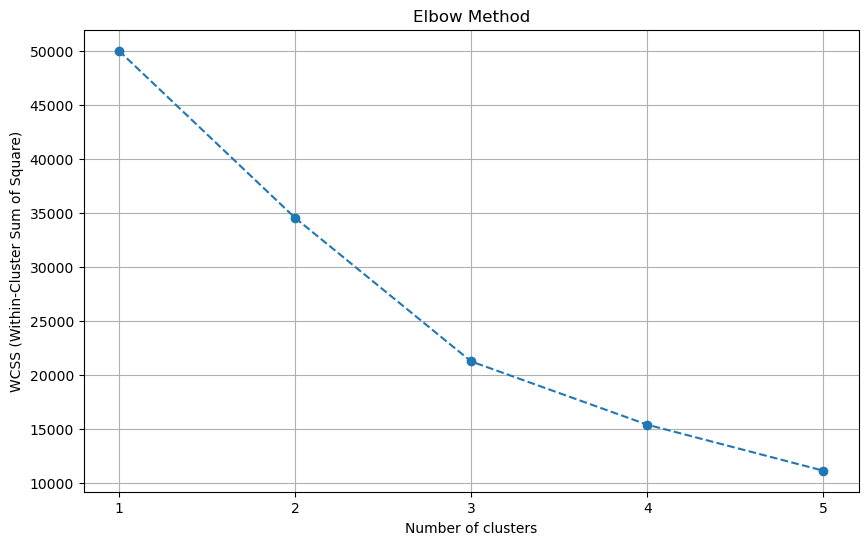

In [257]:
plt.figure(figsize=(10,6))
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.title('Elbow Method')
plt.xticks(np.arange(1, max_clusters+1, 1))
plt.grid(True)
plt.show()

Stap 3:  interpretatie van de cluster 

In [258]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

Cluster label toevoegen aan data 

In [259]:
customer_df['Cluster'] = clusters
customer_df.head()

Product Category,Customer ID,beauty,clothing,electronics,home goods,sports,Cluster
0,1,10.18,325.54,0.00,0.00,0.00,2
1,2,0.00,0.00,0.00,0.00,22.67,0
2,3,0.00,0.00,181.94,38.18,0.00,1
3,4,0.00,0.00,0.00,0.00,36.22,0
4,5,0.00,0.00,0.00,0.00,34.26,0


Analyse van de cluster karakteristieken

In [260]:
cluster_profile = customer_df.groupby('Cluster').mean().T
print("Cluster Characteristics:")
print(cluster_profile)

Cluster Characteristics:
Cluster                     0            1            2
Product Category                                       
Customer ID       4963.053987  5034.757895  4985.194187
beauty               0.000000     0.000000    10.019193
clothing             0.000000     0.000000   150.453393
electronics          0.000000   302.400574     0.000000
home goods           0.000000    50.084581     0.000000
sports              30.003145     0.000000     0.000000


visualiseren van de clusters

<Figure size 1200x600 with 0 Axes>

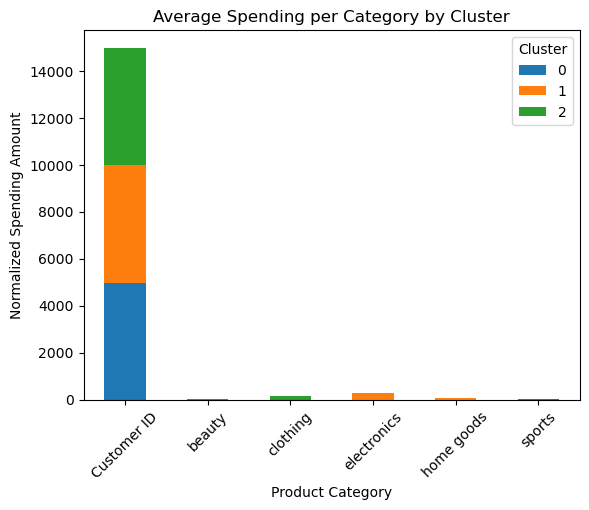

In [261]:
plt.figure(figsize=(12,6))
cluster_profile.plot(kind='bar', stacked=True)
plt.title('Average Spending per Category by Cluster')
plt.ylabel('Normalized Spending Amount')
plt.xticks(rotation=45)
plt.show()